# Record something 

Recording chunk 1/30...
(88200, 1)


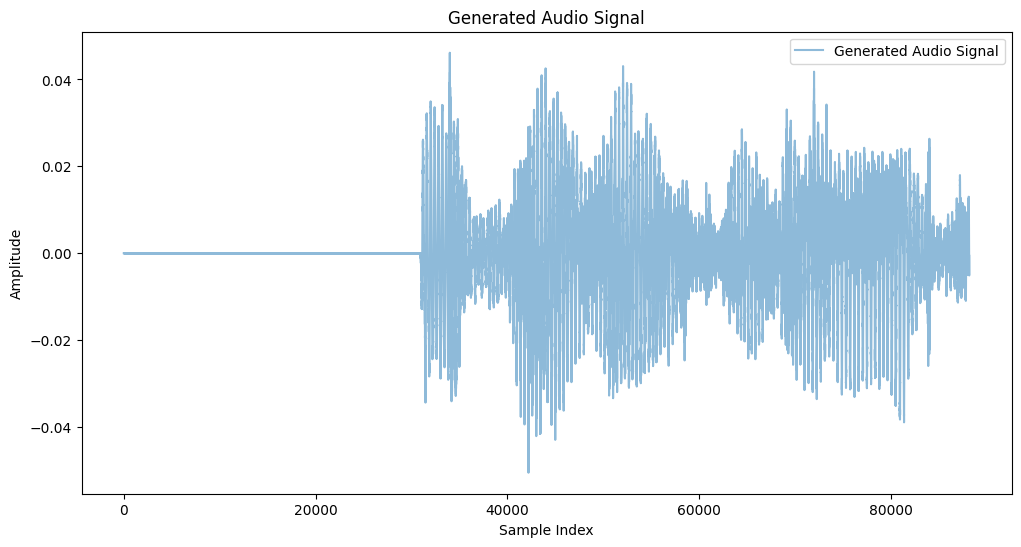

Recording chunk 2/30...
(88200, 1)


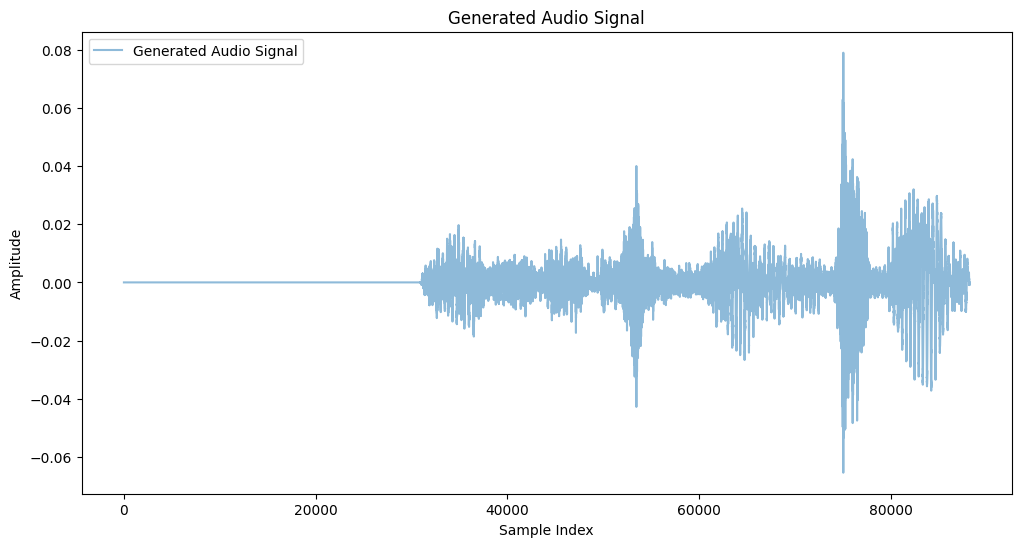

Recording chunk 3/30...
(88200, 1)


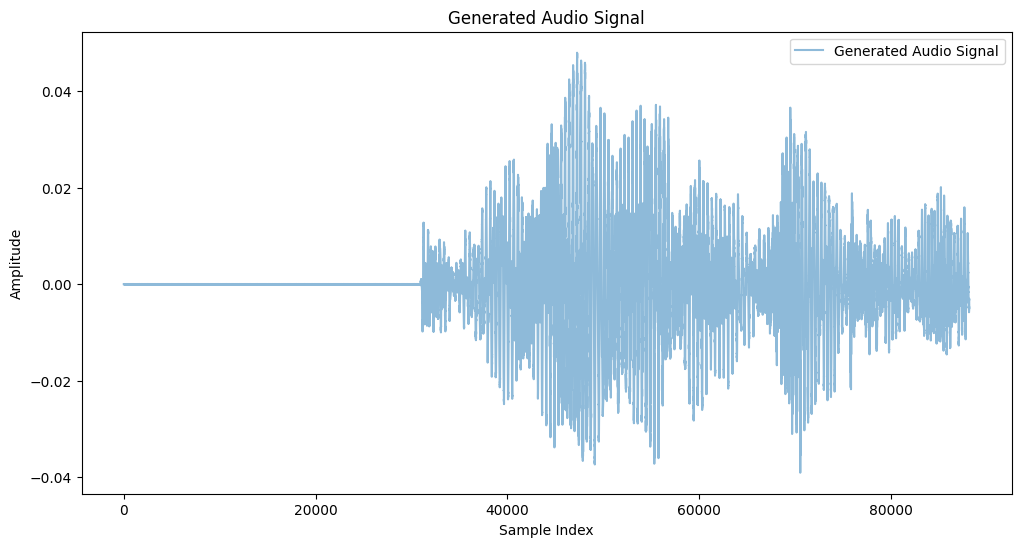

Recording chunk 4/30...
(88200, 1)


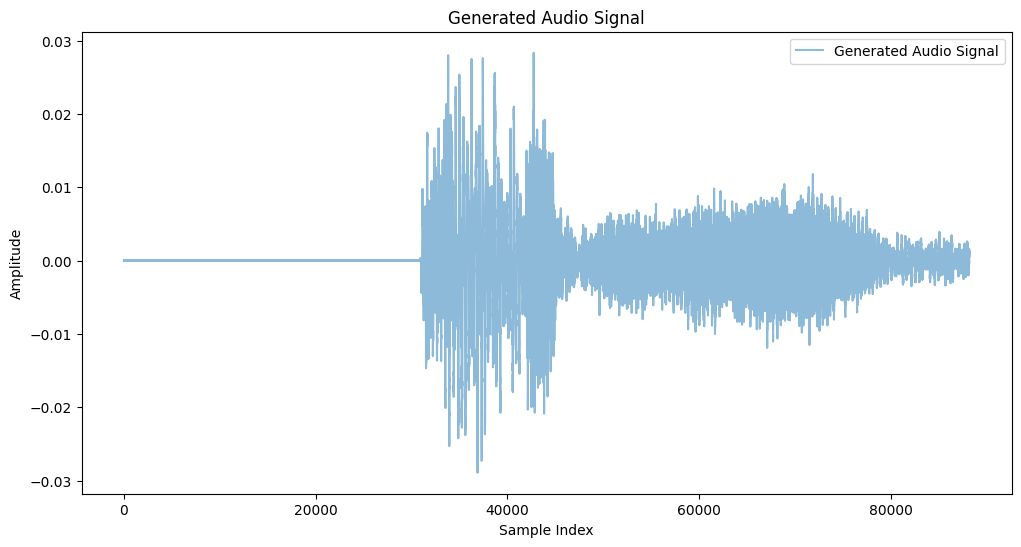

Recording chunk 5/30...
(88200, 1)


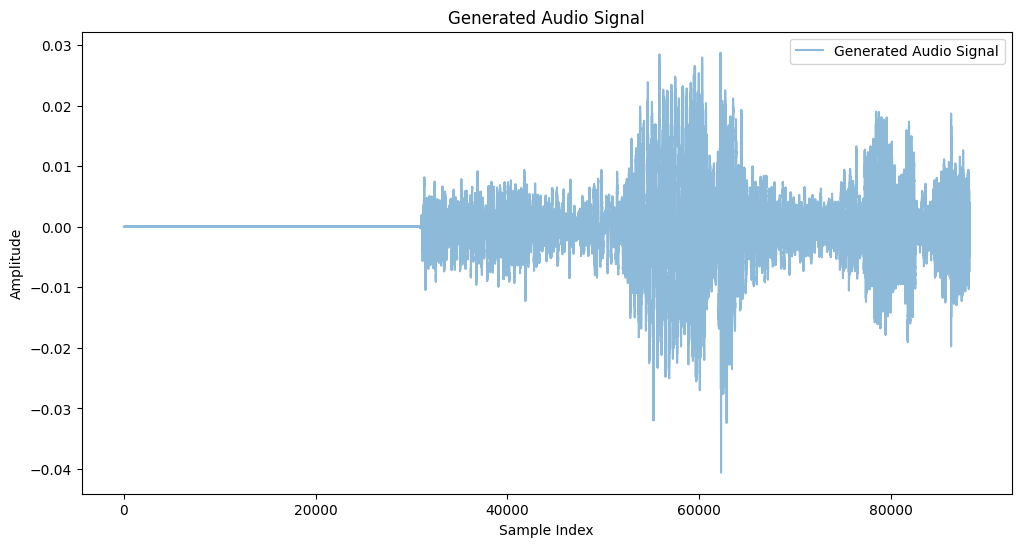

Recording chunk 6/30...
(88200, 1)


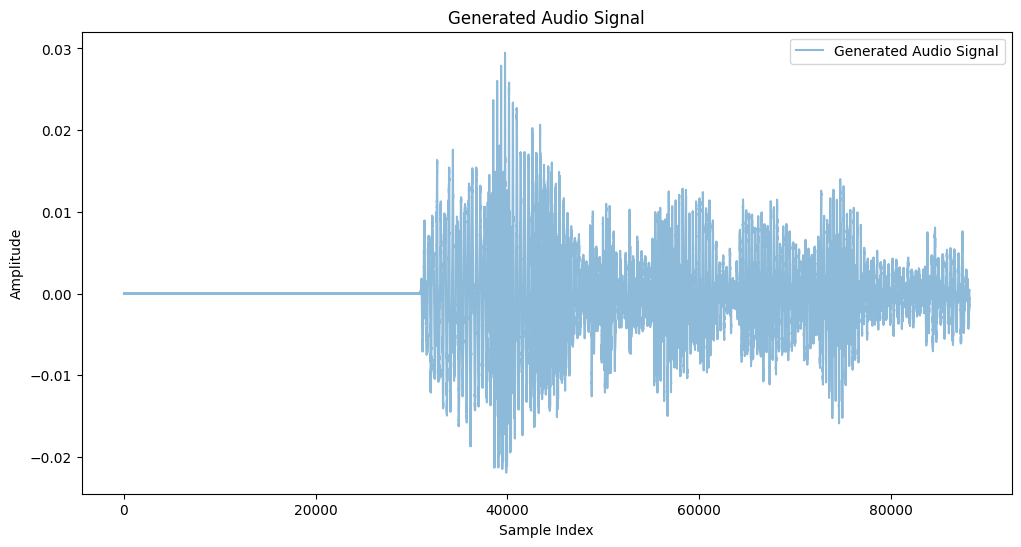

Recording chunk 7/30...
(88200, 1)


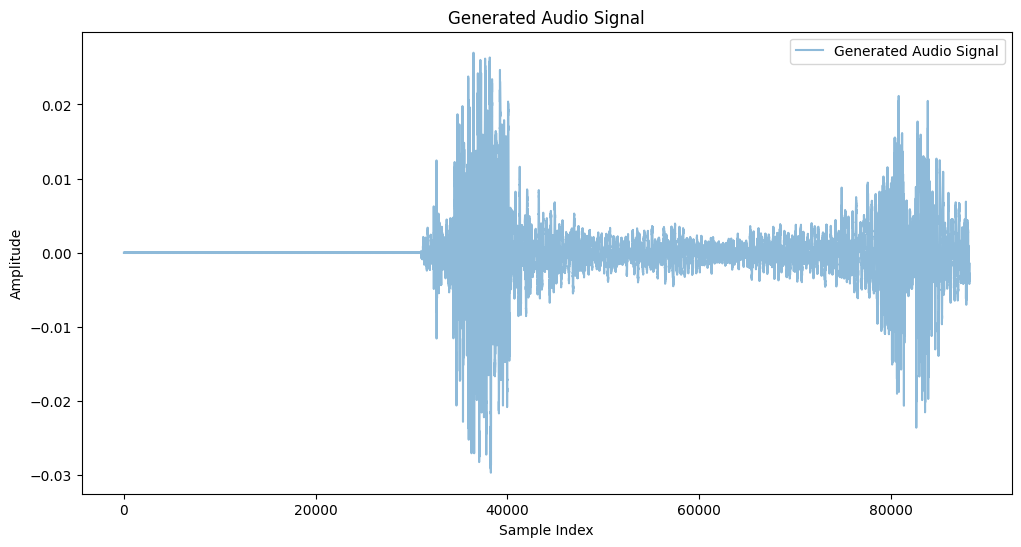

Recording chunk 8/30...
(88200, 1)


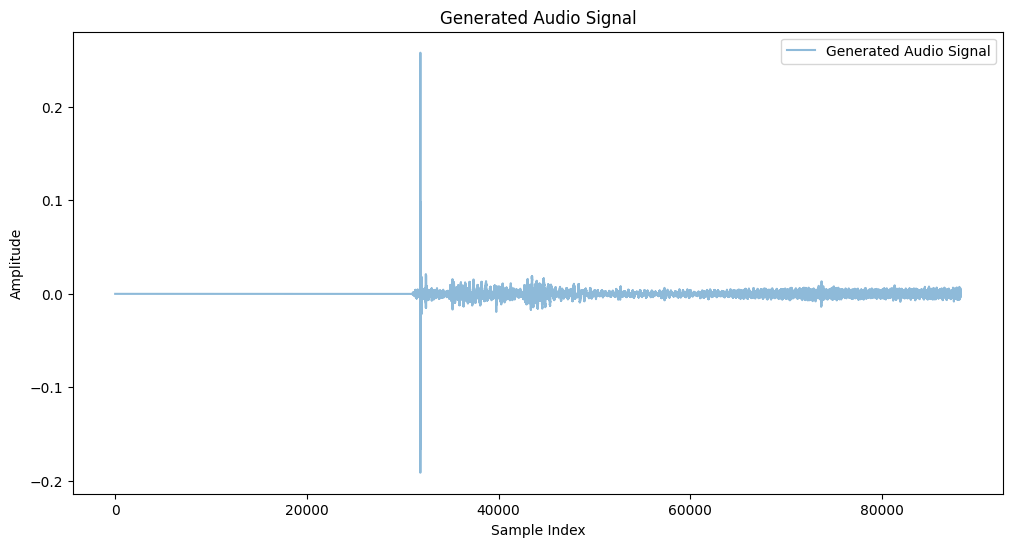

Recording chunk 9/30...
(88200, 1)


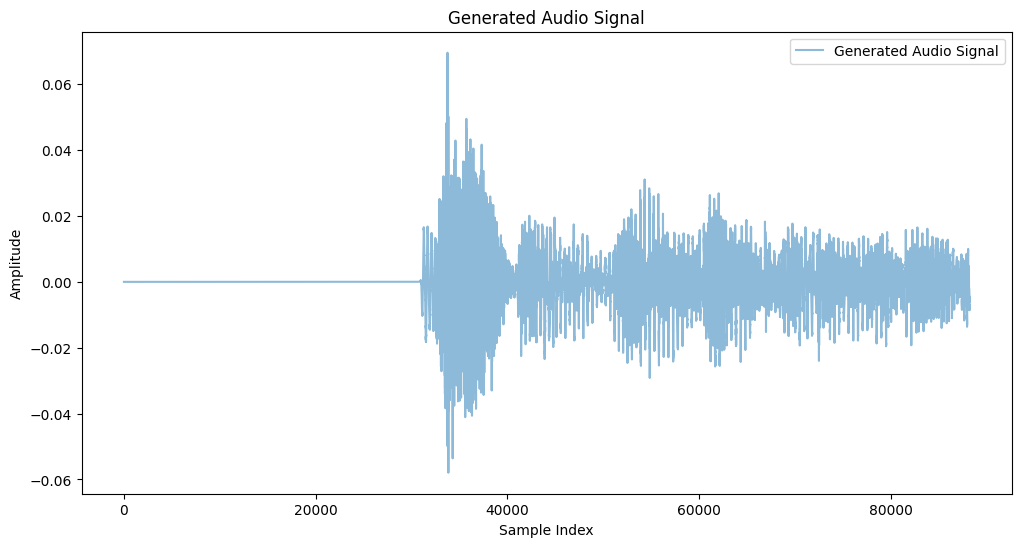

Recording chunk 10/30...


KeyboardInterrupt: 

In [2]:
import sounddevice as sd
import numpy as np
from scipy.io.wavfile import write
from datetime import datetime
import matplotlib.pyplot as plt

# Parameters
fs = 44100  # Sample rate
total_duration = 60  # Total duration of recording in seconds
chunk_duration = 2  # Duration of each chunk in seconds

# Calculate the number of chunks
num_chunks = total_duration // chunk_duration

for i in range(num_chunks):
    print(f"Recording chunk {i + 1}/{num_chunks}...")
    
    # Record audio for the specified chunk duration from the microphone
    recording = sd.rec(int(chunk_duration * fs), samplerate=fs, channels=1, dtype='float32')  # Set channels=1 for mono
    sd.wait()  # Wait until recording is finished
    
    # Create a timestamp for the filename
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Save the recording as a WAV file with a timestamp
    write(f'audios/output_chunk_{i + 1}_{timestamp}.wav', fs, recording)
    
    # Convert to NumPy array and save as .npy file with a timestamp
    np.save(f'audios/output_chunk_{i + 1}_{timestamp}.npy', recording)

    # plot the signal 
    print(recording.shape)
    # Plot the generated audio signal
    plt.figure(figsize=(12, 6))
    plt.plot(recording, label='Generated Audio Signal', alpha=0.5)
    plt.title('Generated Audio Signal')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()
    
print("Recording completed.")

